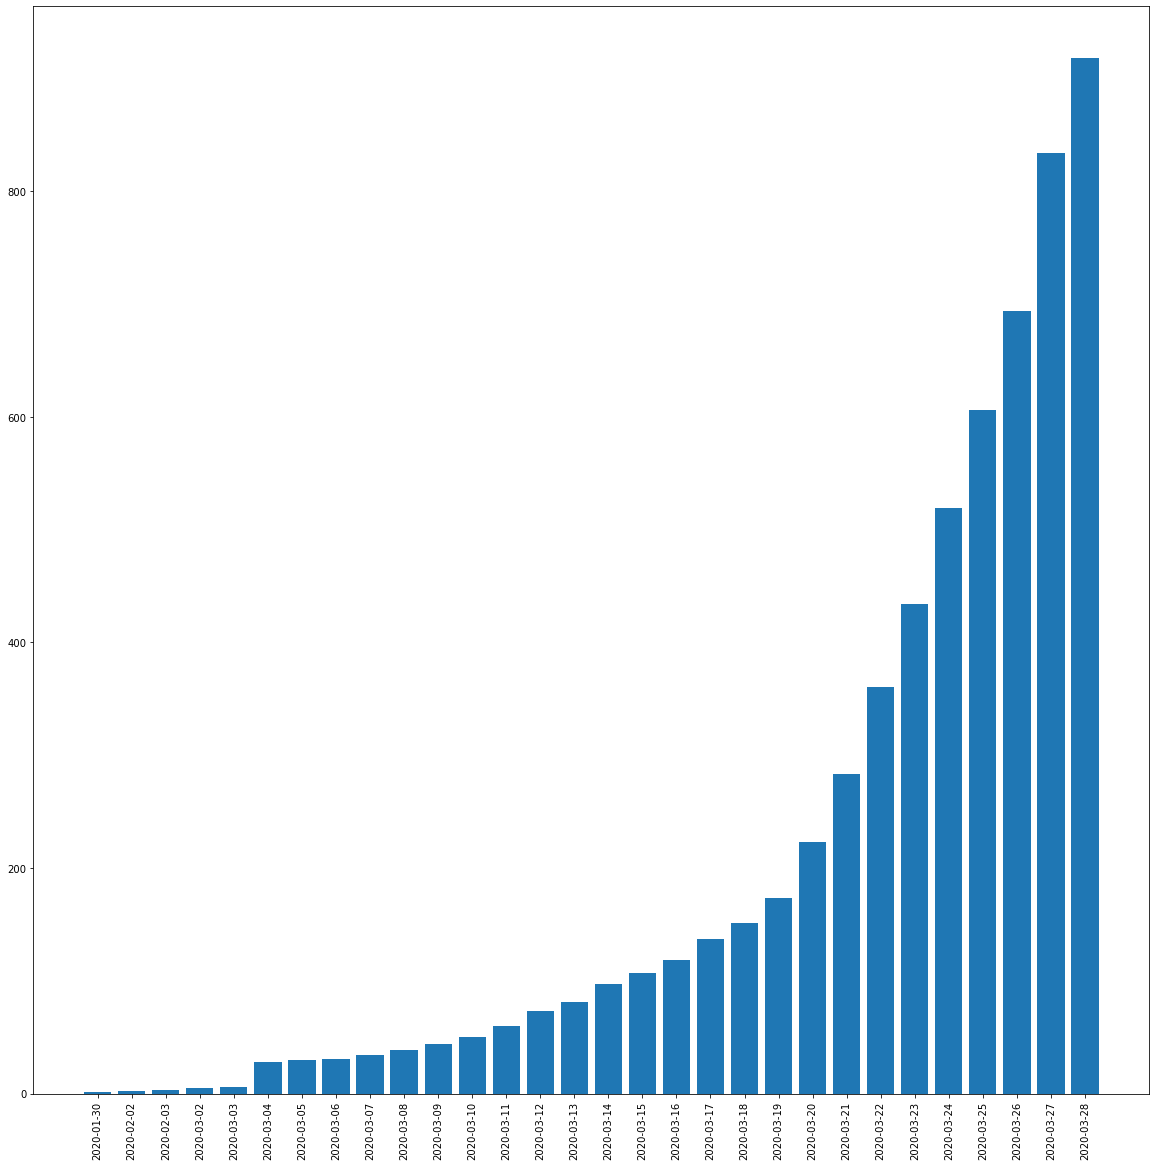

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
url = "https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_India"
link = requests.get(url)
link = link.content
data = soup(link)
corona_datas =data.findAll('div',{'class': 'barbox tright'})
corona_data = corona_datas[0]
date = corona_data.findAll('td',{'colspan':'2'})
patients = corona_data.findAll('span',{'class' : 'nowrap'})
date = [ct.text for ct in date]
number_of_patients = [ct.text for ct in patients]    

for  text in date:
    if text == '⋮' :
        date.remove(text)
for text in number_of_patients:
    if text ==  '\xa0\xa0\xa0' in number_of_patients:
        number_of_patients.remove(text)
    if text ==  '\xa0\xa0\xa0' in number_of_patients:
        number_of_patients.remove(text)
    if text ==  '\xa0\xa0' in number_of_patients:
        number_of_patients.remove(text)           
filename = "Corona_details.csv"
patient_number = []
increase = []
for text in number_of_patients:
    inc = text
    text = text[:-1]
    number = text.find('(')
   #print(number,end=",")  
    sles = text.find('\u202c')
    if number!=-1:
        inc = text[number+1:-1]
        text  = text[:number]
    if number == -1:
        inc = text[:]
    if sles!=-1:
        text = text[:sles]
    patient_number.append(text)
    increase.append(inc)
    

date = date[2:]

#print(increase)

for inc in increase:
    if inc=='=':
        increase.remove(inc)

#print(increase)
patient = [i for n, i in enumerate(patient_number) if i not in patient_number[:n]]
result = dict(zip(date,patient))
with open(filename,'w',encoding = 'utf-8') as f:
    f.write("Date,Number of Patients,Increase in Patients\n")
    count = 0
    for data,number in result.items():
        f.write(data + "," + number + "," + increase[count] + "\n")
        count+=1
    f.close()

file = pd.read_csv("Corona_details.csv")
file.to_excel("Corona.xlsx",index=False)
for i in range(0,len(patient)):
    patient[i] = int(patient[i])
    
    

plt.figure(figsize= (20,20))
#plt.xlim(20,2000) #set your values
#plt.ylim(1,500) #set your values here
plt.xticks(rotation = 90)
plt.bar(date,patient)
plt.show()


+1
